# Benchmark Analysis

In [25]:
import pandas as pd
import seaborn as sns
from sqlite3 import connect

In [26]:
conn = connect("../data.db")
df = pd.read_sql("SELECT * FROM data", conn)
df['circuit'] = df.apply(lambda row: row["ansatz"] if row["ansatz"] else row["mixer"], axis=1)
df

,algorithm,mixer,ansatz,depth,optimizer,feasibility_ratio,cost_ratio,rank,time_sec,circuit
0,vqe,None,two_local,1,spsa,0.006599,0.737915,1.9,232.271669,two_local
1,vqe,None,two_local,2,spsa,0.004940,0.777958,1.9,234.330162,two_local
2,vqe,None,two_local,3,spsa,0.004149,0.785880,3.1,245.251415,two_local
3,vqe,None,two_local,4,spsa,0.003585,0.758558,3.1,251.486854,two_local
4,vqe,None,two_local,5,spsa,0.002357,0.737671,2.2,266.039123,two_local
...,...,...,...,...,...,...,...,...,...,...
174,qaoa,row_swap_mixer,None,1,slsqp,0.000386,0.546581,1.0,675.885075,row_swap_mixer
175,qaoa,row_swap_mixer,None,2,slsqp,0.000232,0.310246,1.0,3876.434685,row_swap_mixer
176,qaoa,row_swap_mixer,None,3,slsqp,0.000310,0.454047,1.2,6952.512097,row_swap_mixer
177,qaoa,row_swap_mixer,None,4,slsqp,0.000335,0.596489,1.0,11569.355553,row_swap_mixer


## Top rankings

In [27]:
df_rankings = df.drop(columns=["ansatz", "mixer"])
df_rankings = df_rankings.reindex(columns=["algorithm", "circuit", "depth", "optimizer", "feasibility_ratio", "cost_ratio", "rank", "time_sec"])

In [28]:
df_by_feasibility = df_rankings.drop(columns=["rank", "cost_ratio", "time_sec"])
df_table = df_by_feasibility.sort_values(by="feasibility_ratio", ascending=False).head(10).style.relabel_index([i for i in range(1,11)])
df_table

,algorithm,circuit,depth,optimizer,feasibility_ratio
1,vqe,real_amplitudes,2,cobyla,0.035083
2,vqe,two_local,1,cobyla,0.029322
3,vqe,two_local,1,powell,0.026606
4,vqe,efficientSU2,1,cobyla,0.025375
5,vqe,real_amplitudes,1,cobyla,0.023279
6,vqe,two_local,2,cobyla,0.018038
7,vqe,two_local,3,cobyla,0.017884
8,vqe,pauli_two_design,4,cobyla,0.012909
9,vqe,pauli_two_design,5,cobyla,0.011833
10,vqe,two_local,4,cobyla,0.011553


In [29]:
df_by_cost_ratio = df_rankings.drop(columns=["feasibility_ratio", "rank", "time_sec"])
df_table = df_by_cost_ratio.sort_values(by="cost_ratio", ascending=False).head(10).style.relabel_index([i for i in range(1,11)])
df_table

,algorithm,circuit,depth,optimizer,cost_ratio
1,vqe,pauli_two_design,4,spsa,0.789921
2,vqe,two_local,3,spsa,0.785880
3,vqe,two_local,2,spsa,0.777958
4,vqe,real_amplitudes,2,spsa,0.772742
5,qaoa,ring_mixer,5,spsa,0.772619
6,vqe,real_amplitudes,1,cobyla,0.772378
7,qaoa,ring_mixer,3,powell,0.771932
8,vqe,real_amplitudes,3,cobyla,0.768138
9,vqe,real_amplitudes,3,powell,0.767218
10,vqe,two_local,3,cobyla,0.765467


In [30]:
# df_by_rank = df_rankings.drop(columns=["feasibility_ratio", "cost_ratio", "time_sec"])
# df_by_rank.sort_values(by="rank", ascending=True).head(10).style.relabel_index([i for i in range(1,11)])

In [31]:
df_by_time = df_rankings.drop(columns=["feasibility_ratio", "cost_ratio", "rank"])
df_table = df_by_time.sort_values(by="time_sec", ascending=False).head(10).style.relabel_index([i for i in range(1,11)])
# print(df_table.to_latex())
df_table

,algorithm,circuit,depth,optimizer,time_sec
1,qaoa,row_swap_mixer,5,slsqp,23183.959918
2,vqe,pauli_two_design,5,slsqp,22915.026794
3,vqe,two_local,4,slsqp,20145.564938
4,vqe,pauli_two_design,4,slsqp,19484.493946
5,vqe,two_local,3,slsqp,16104.144203
6,vqe,pauli_two_design,3,slsqp,15892.709027
7,qaoa,row_swap_mixer,4,slsqp,11569.355553
8,vqe,two_local,2,slsqp,10690.054291
9,qaoa,row_swap_mixer,5,powell,10594.737945
10,vqe,two_local,5,slsqp,10494.323821


## Graphs

In [47]:
custom_palette_opt = {
    "spsa": "blue",
    "powell": "orange",
    "cobyla": "red",
    "slsqp": "green",
}

### VQE

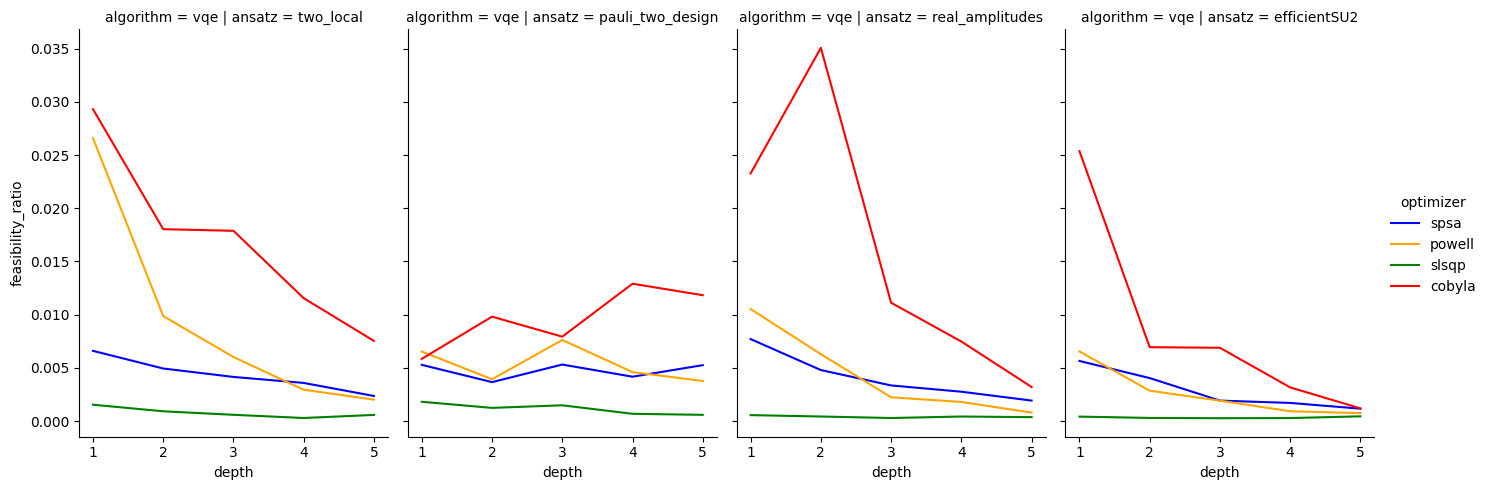

In [48]:
sns.relplot(
    data=df[df["algorithm"] == "vqe"],
    kind="line",
    x="depth",
    y="feasibility_ratio",
    row="algorithm",
    col="ansatz",
    hue="optimizer",
    aspect=.7,
    palette=custom_palette_opt
)

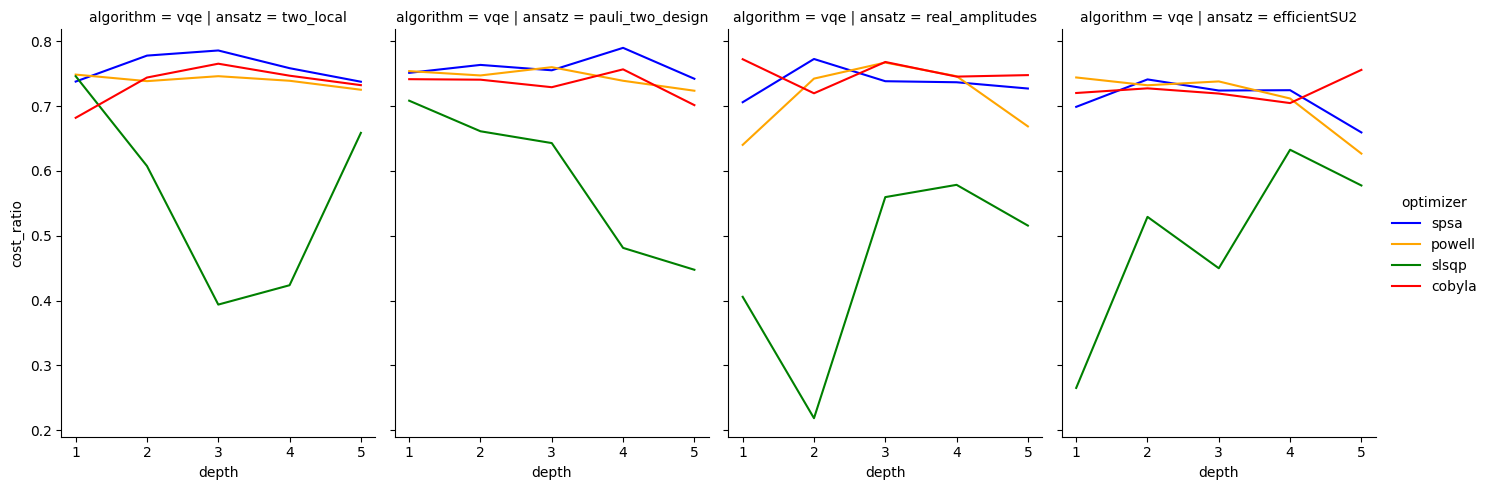

In [49]:
sns.relplot(
    data=df[df["algorithm"] == "vqe"],
    kind="line",
    x="depth",
    y="cost_ratio",
    row="algorithm",
    col="ansatz",
    hue="optimizer",
    aspect=.7,
    palette=custom_palette_opt
)

In [50]:
# g = sns.relplot(
#     data=df,
#     kind="line",
#     x="depth",
#     y="rank",
#     col="ansatz",
#     hue="optimizer",
#     aspect=.7,
#     palette=custom_palette_opt
# )
# g.figure.axes[0].invert_yaxis()

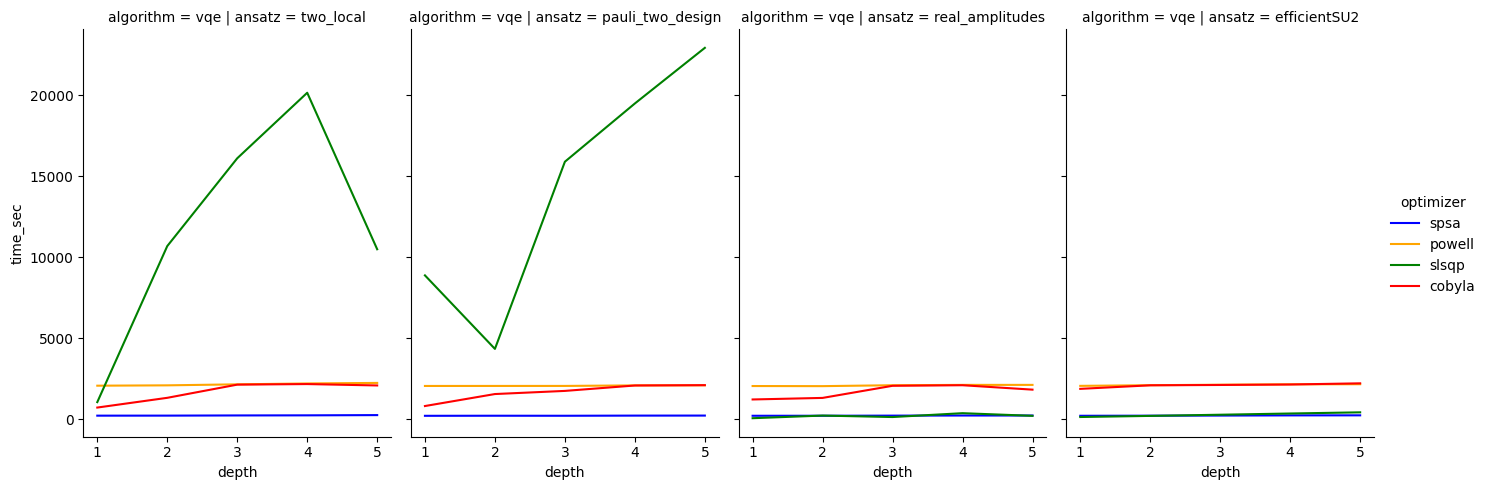

In [51]:
sns.relplot(
    data=df[df["algorithm"] == "vqe"],
    kind="line",
    x="depth",
    y="time_sec",
    row="algorithm",
    col="ansatz",
    hue="optimizer",
    aspect=.7,
    palette=custom_palette_opt
)

### QAOA

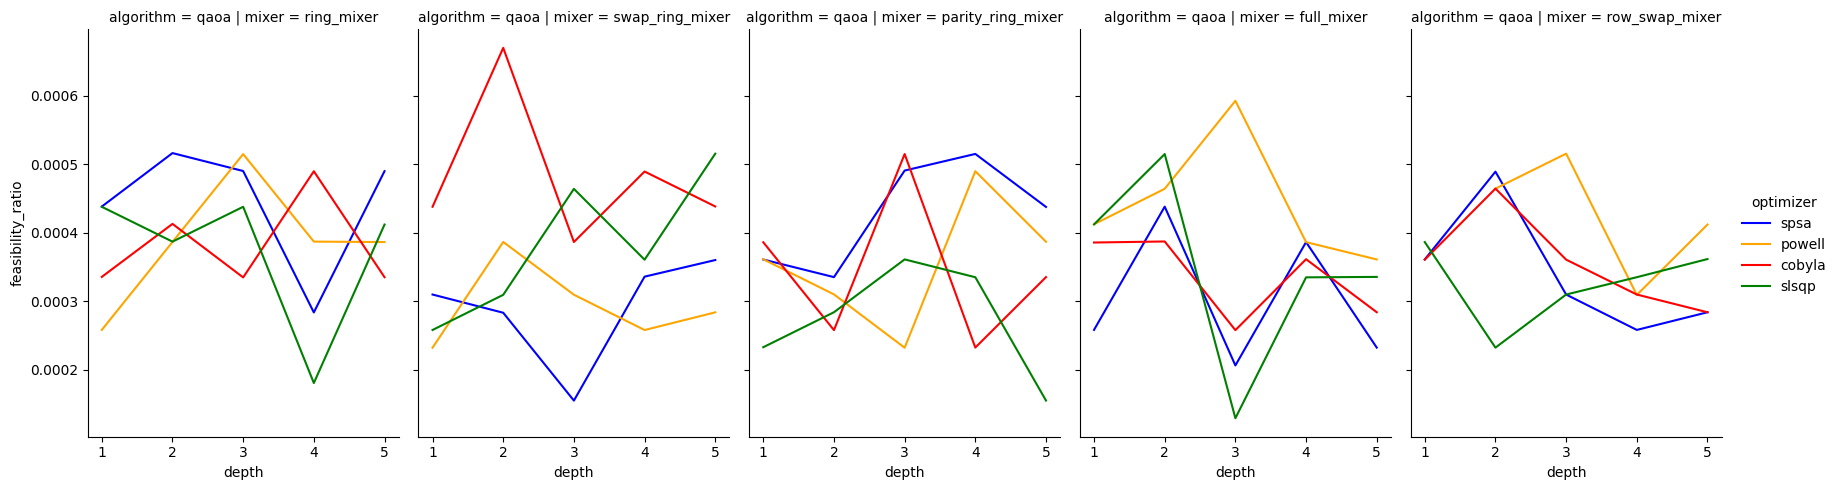

In [58]:
sns.relplot(
    data=df[df["algorithm"] == "qaoa"],
    kind="line",
    x="depth",
    y="feasibility_ratio",
    row="algorithm",
    col="mixer",
    hue="optimizer",
    aspect=.7,
    palette=custom_palette_opt
)

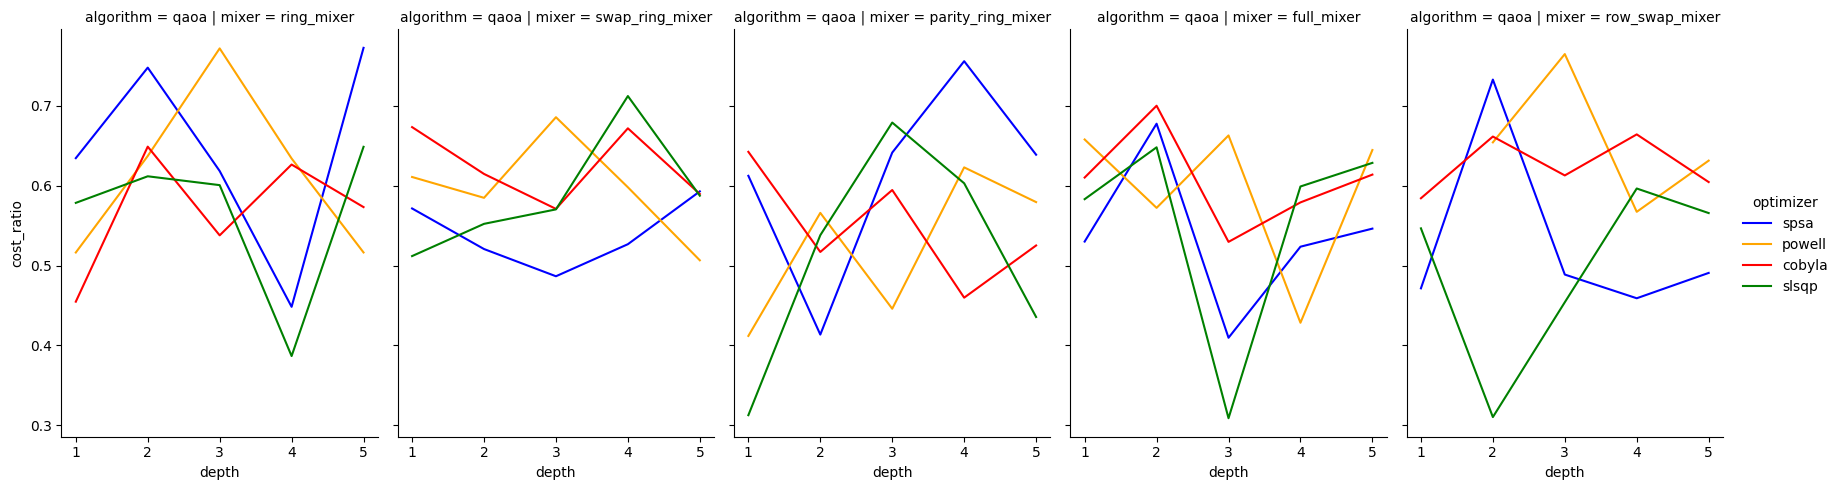

In [57]:
sns.relplot(
    data=df[df["algorithm"] == "qaoa"],
    kind="line",
    x="depth",
    y="cost_ratio",
    row="algorithm",
    col="mixer",
    hue="optimizer",
    aspect=.7,
    palette=custom_palette_opt
)

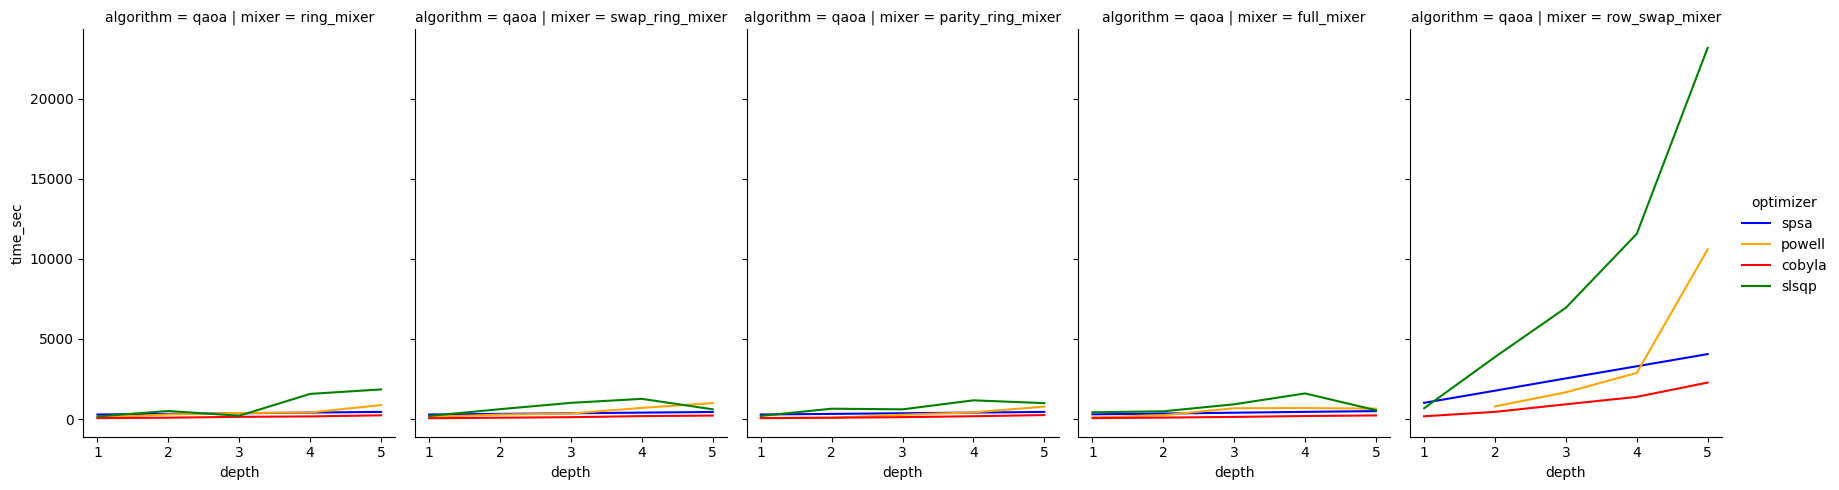

In [56]:
sns.relplot(
    data=df[df["algorithm"] == "qaoa"],
    kind="line",
    x="depth",
    y="time_sec",
    row="algorithm",
    col="mixer",
    hue="optimizer",
    aspect=.7,
    palette=custom_palette_opt
)